In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import os

In [2]:
df=pd.read_csv('Advertising.csv', index_col=0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# check the shape of the DataFrame (rows, columns)
df.shape

(200, 4)

What are the features?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
What is the response?

Sales: sales of a single product in a given market (in thousands of items)
What else do we know?

Because the response variable is continuous, this is a regression problem.
There are 200 observations (represented by the rows), and each observation is a single market.

# Exploratory data analysis

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### check and remove skewness from dataset by using feature transformation

In [6]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [7]:
df.kurtosis()

TV          -1.226495
radio       -1.260401
newspaper    0.649502
sales       -0.408869
dtype: float64

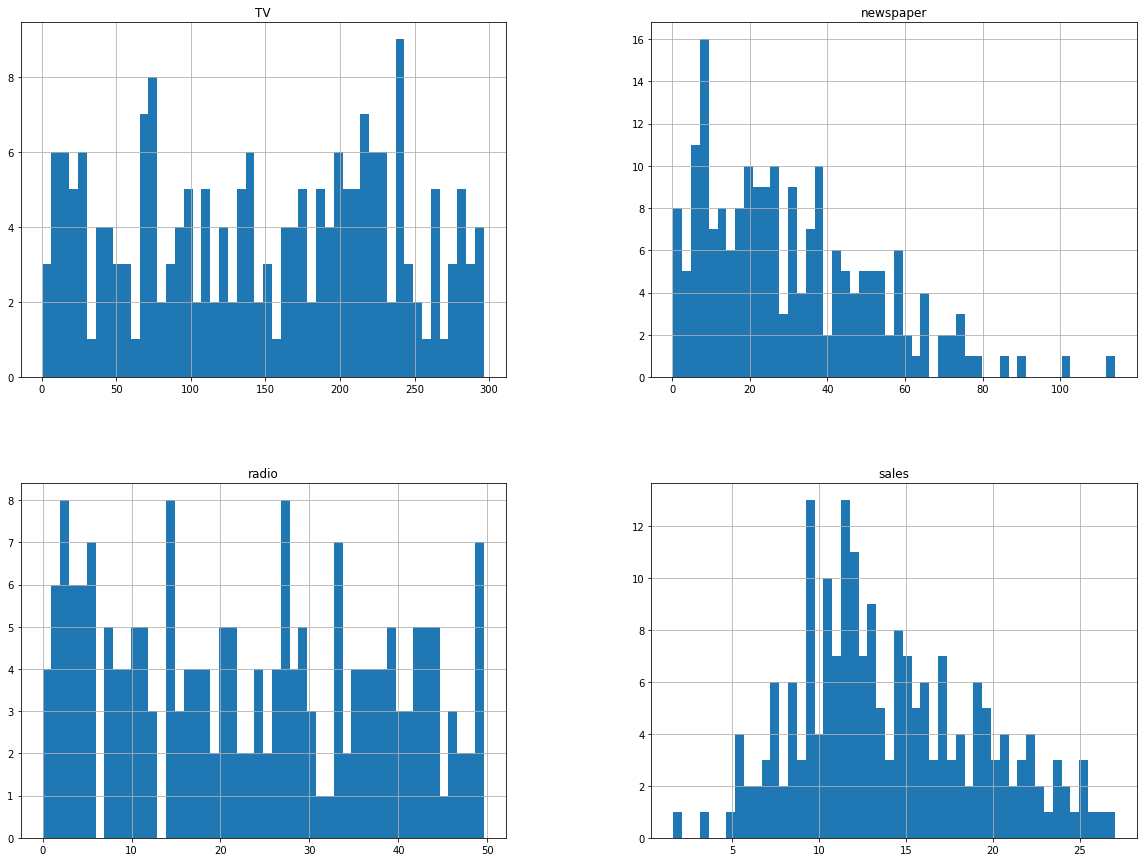

In [8]:
df.dropna().hist(bins=50,figsize=(20,15))
plt.show()

from above fig we can see that there is one feature is suffering from right skew.

Text(0.5, 0, 'sq_root-newspaper')

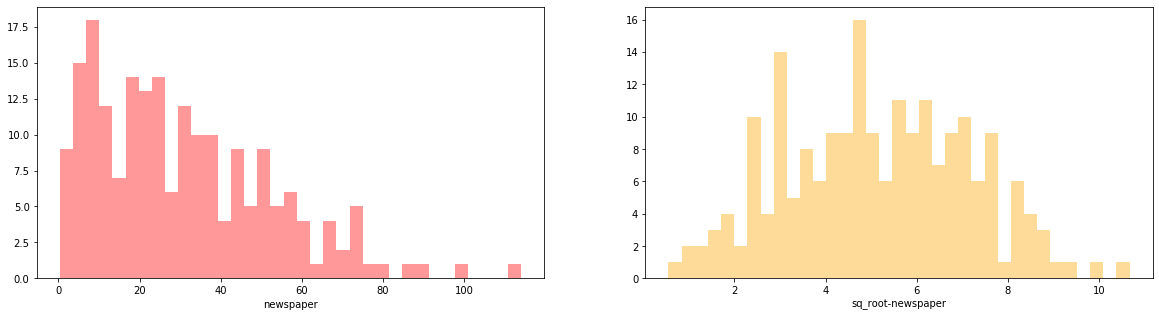

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df.newspaper.dropna(), ax=ax[0], bins=35,kde=False, color="red")
sns.distplot(np.sqrt(df.newspaper.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("sq_root-newspaper")

In [10]:
print('Skewness: %f' % np.sqrt(df.newspaper.dropna().skew()))
print('Kurtsis: %f' % np.sqrt(df.newspaper.dropna().kurt()))

Skewness: 0.945897
Kurtsis: 0.805917


##### Bivariate Analysis
Bivariate analysis is vital part of data analysis process for, it gives clear picture on how each features are affected in presence of other features

<Figure size 1008x720 with 0 Axes>

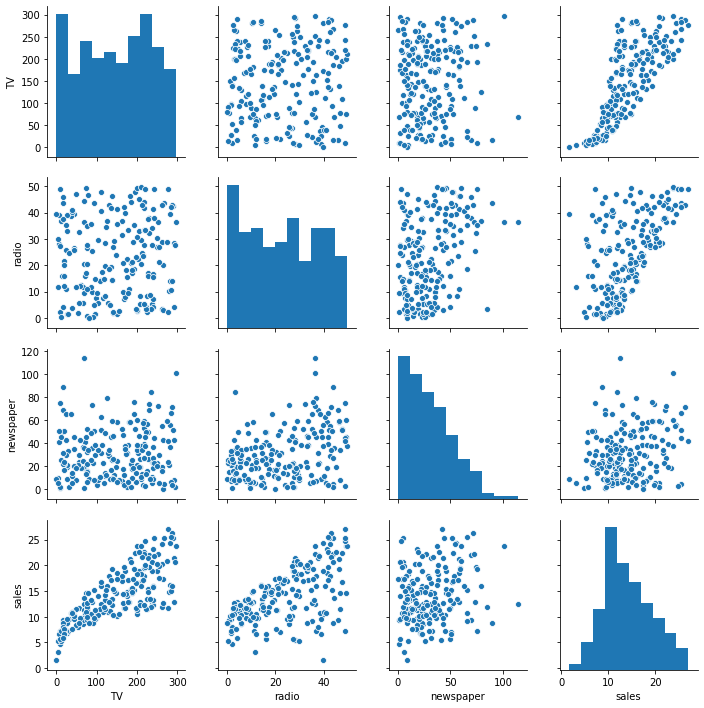

In [11]:
plt.figure(figsize=(14,10))
sns.pairplot(df) 

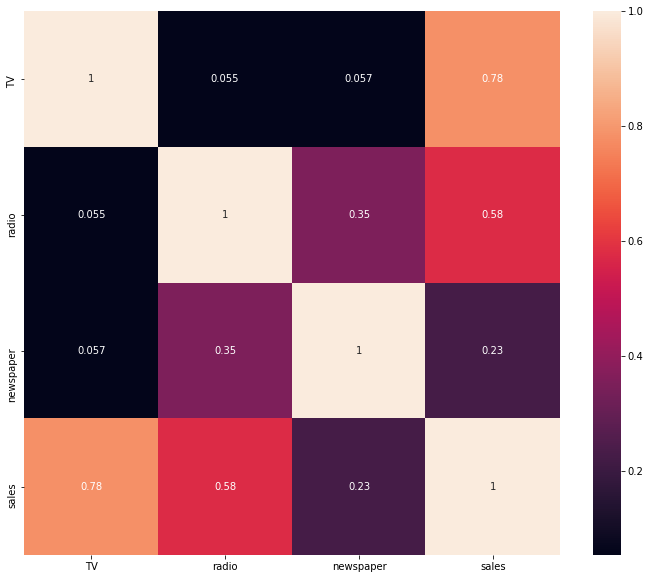

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


as we can see that the highest correlation between tv and sales is 0.782.
Linear regression

Strong relationship between TV ads and sales
Weak relationship between Radio ads and sales
Very weak to no relationship between Newspaper ads and sales

# 4. Linear regression Pros and Cons
Pros:

->Fast
->No tuning required
->Highly interpretable
->Well-understood

Cons:

->Unlikely to produce the best predictive accuracy
->Presumes a linear relationship between the features and response
->If the relationship is highly non-linear as with many scenarios, linear relationship will not effectively model the           
  relationship and its prediction would not be accurate

In [14]:
X = df.drop('sales',1)
X['newspaper'] = np.sqrt(X.newspaper)
X.head()

,TV,radio,newspaper
1,230.1,37.8,8.318654
2,44.5,39.3,6.715653
3,17.2,45.9,8.324662
4,151.5,41.3,7.648529
5,180.8,10.8,7.641989


In [15]:
# select a Series from the DataFrame
y = df['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

#### Splitting X and y into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)

# Linear regression in scikit-learn

In [17]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

#### Computing the RMSE for our Sales predictions

In [19]:
import sklearn.metrics as metrics
from math import sqrt
print(np.sqrt(metrics.r2_score(y_test, y_pred)))

0.944362208161206


In [20]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.417517776814912


### find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [21]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    #print(model,parameters)
    
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True, n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_MSE = mean_squared_error(y_test, y_pred)
    train_MSE = mean_squared_error(y_train, train_y_pred)
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_RMSE across ALL models:\n",
          train_MSE)
                                    
    print("\n The test_RMSE across ALL models:\n",
          test_MSE) 
    
    print (plt.show())
    
    print("\n ========================================================")

C:\Users\PINTU\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\PINTU\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.02, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.5, tree_method=None,
       validate_parameters=False, verbosity=None)

 The best score across ALL searched params:
 0.97833482165873

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

 The train_RMSE across ALL models:
 0.005530183355291507

 The test_RMSE across 

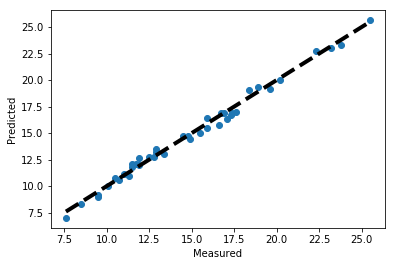

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.5, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9829096856814307

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

 The train_RMSE across ALL models:
 0.010706099894030398

 The test_RMSE across ALL models:
 0.18032252367

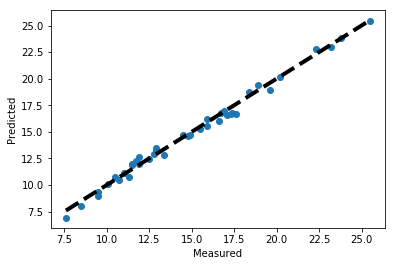

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=45, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9662401713405444

 The best parameters across ALL searched params:
 {'max_depth': 6, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 45}

 The train_RMSE across ALL models:
 0.13589706301670912

 The test_RMSE across ALL models:
 0.4509888346697938


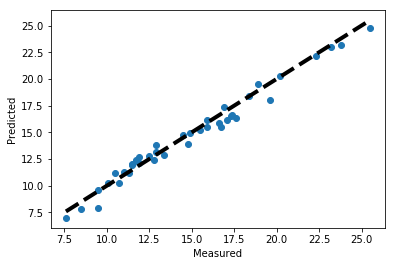

None



In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
alg = [XGBRegressor(), GradientBoostingRegressor(),RandomForestRegressor()]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
                
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              {'max_depth'    : [4,6,8],
              'n_estimators' : [100,500,1000],
              'min_samples_leaf':[1,2,3],
              'random_state': [40,45,50]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                          
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

we can see that the 'GradientBoostingRegressor' model has best score and their true positive rate and false positive rate are better as campare to other models

#### bar plot of features importances

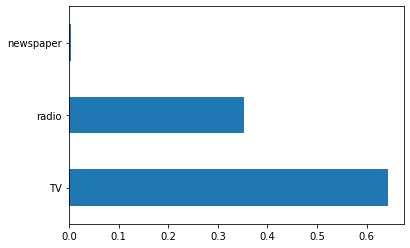

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

#### from this graph we can see that the most important feature for this model is 'Tv'.

## save model

In [23]:
import pickle

In [24]:
filename='advertising_GradientBoostingRegressor_model.sav'

In [25]:
pickle.dump(model, open(filename, 'wb'))

In [26]:
load_lr_model =pickle.load(open(filename, 'rb'))